# Study of the Supervised Descent Method in Face Alignement

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

# Import modules
from src.get_data import get_data
from src.model import SDM

## Dataset analysis

The first step in order to train the model is to create a training dataset, which will be constitued of picture of faces with a target landmark.

For this we use the `get_data` function, that return train and test sets of instances of the Image class splitted.

Each instance of image gets a true landmark that is used for learning or computing error.

For training landmarks are initiated at a mean face shape at the center of a box found by the haar cascade face finder model.



In [3]:

DATA_PATH = r"data\ibug_300W_large_face_landmark_dataset\afw" 
t0 = time.time()
train_data, test_data, mean_shape = get_data(DATA_PATH, train_split=0.8)
print(f"Loaded data in {time.time()-t0:.2f} seconds.")
print(f"Number of train pictures : {len(train_data)}")
print(f"Number of test pictures : {len(test_data)}")

Data loaded: 269 Train, 68 Test.
Loaded data in 31.28 seconds.
Number of train pictures : 269
Number of test pictures : 68


## Processing code


### Training


In [ ]:
# On crée le modèle
# n_step=4 ou 5 est recommandé dans le papier
model = SDM(n_step=3)

# Lancement du fit
t0 = time.time()
model.fit(train_data)
print(f"Entraînement terminé en {time.time()-t0:.2f} secondes.")

Training SDM on 269 images for 3 steps.


### Test and visualization

3. Visualisation des résultats...
Test sur l'image 0


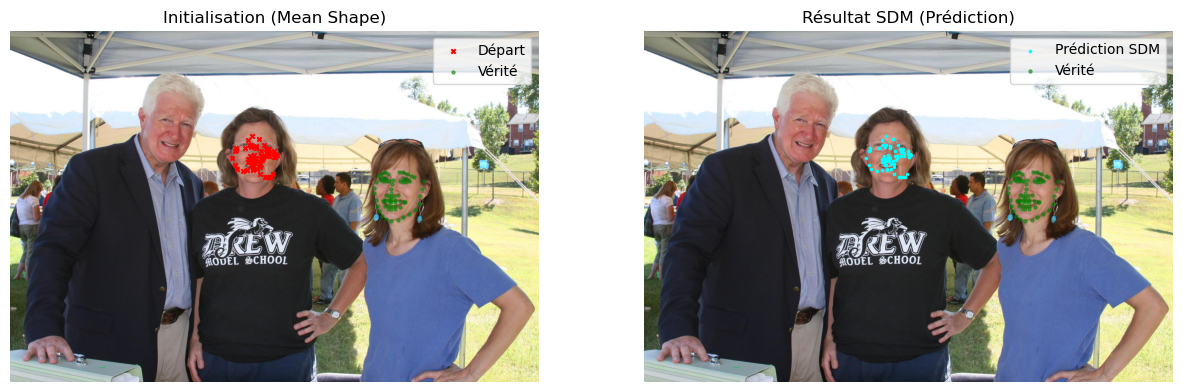

Test sur l'image 1


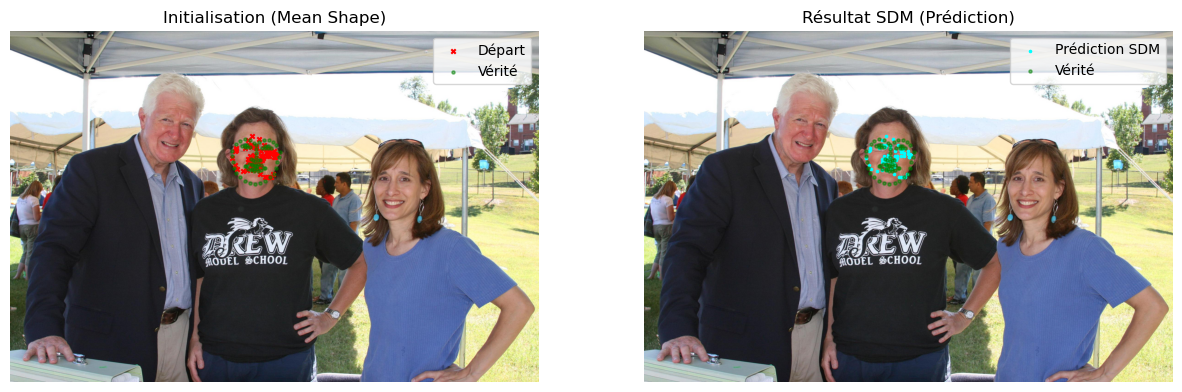

Test sur l'image 2


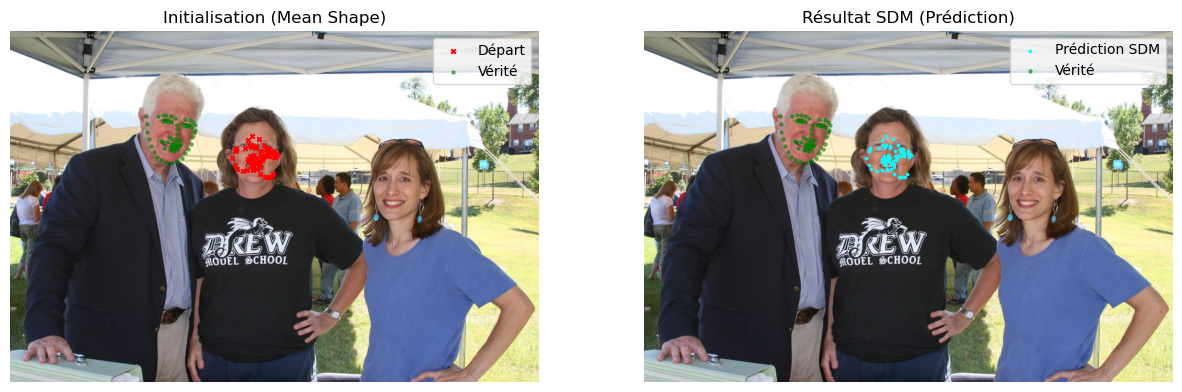

Test sur l'image 3


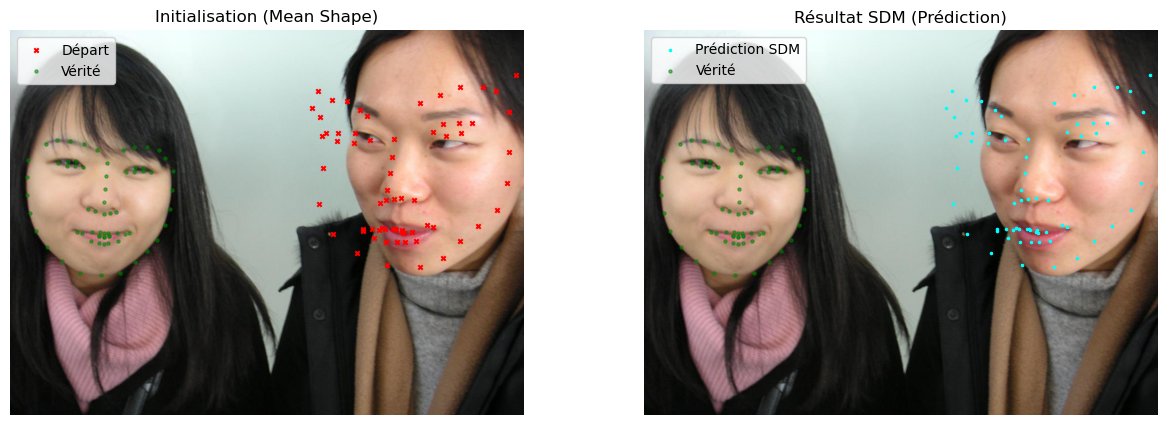

Test sur l'image 4


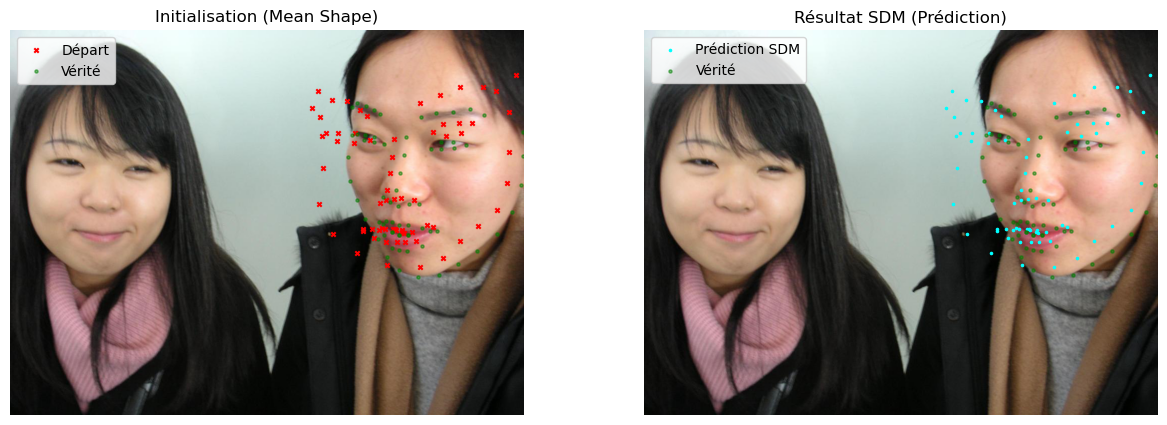

Test sur l'image 5


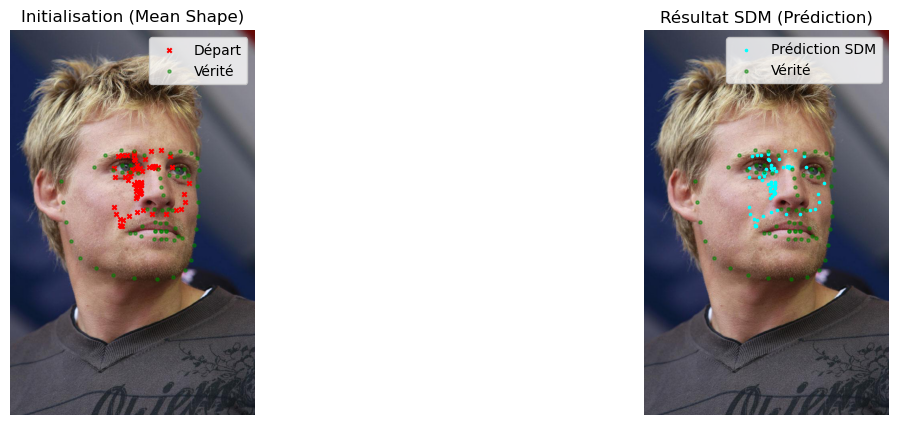

In [ ]:
def visualize_result(model, image_obj):
    """
    Fonction helper pour afficher : Init vs Prediction vs Vérité
    """
    # 1. Prédiction (utilise deepcopy en interne grâce à ta correction)
    predicted_landmark = model.predict(image_obj)
    
    # 2. Affichage
    plt.figure(figsize=(15, 5))
    
    # --- Image 1 : Initialisation (Avant optimisation) ---
    plt.subplot(1, 2, 1)
    plt.title("Initialisation (Mean Shape)")
    # On montre l'image originale avec son point de départ (current_landmark)
    if len(image_obj.image.shape) == 3:
        plt.imshow(cv2.cvtColor(image_obj.image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image_obj.image, cmap='gray')
        
    # Points de départ (Rouge)
    plt.scatter(image_obj.current_landmark[:, 0], image_obj.current_landmark[:, 1], 
                c='red', s=10, marker='x', label='Départ')
    # Vérité (Vert) pour comparer
    plt.scatter(image_obj.true_landmark[:, 0], image_obj.true_landmark[:, 1], 
                c='green', s=5, alpha=0.5, label='Vérité')
    plt.legend()
    plt.axis('off')

    # --- Image 2 : Résultat (Après SDM) ---
    plt.subplot(1, 2, 2)
    plt.title("Résultat SDM (Prédiction)")
    if len(image_obj.image.shape) == 3:
        plt.imshow(cv2.cvtColor(image_obj.image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image_obj.image, cmap='gray')
        
    # Points prédits (Bleu/Cyan)
    plt.scatter(predicted_landmark[:, 0], predicted_landmark[:, 1], 
                c='cyan', s=10, marker='.', label='Prédiction SDM')
    # Vérité (Vert)
    plt.scatter(image_obj.true_landmark[:, 0], image_obj.true_landmark[:, 1], 
                c='green', s=5, alpha=0.5, label='Vérité')
    plt.legend()
    plt.axis('off')
    
    plt.show()

# Test sur les 3 premières images du set de test
print("3. Visualisation des résultats...")
for i in range(6):
    print(f"Test sur l'image {i}")
    visualize_result(model, test_data[i])